Module 9 Task 1

Laptop Reviews

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

In [2]:
df = pd.read_csv('laptops_dataset_final_600.csv')

In [17]:
# making sure csv data is loaded well
df.head(5)

,product_name,overall_rating,no_ratings,no_reviews,rating,title,review,name
0,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,15210,900,5,Perfect product!,"Loved it, it's my first MacBook that I earned ...",Apple
1,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,15210,900,5,Fabulous!,Battery lasted longer than my first relationsh...,Apple
2,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,15210,900,5,Fabulous!,Such a great deal.. very happy with the perfor...,Apple
3,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,15210,900,4,Delightful,"Awesome build quality and very good display, b...",Apple
4,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,15210,900,5,Awesome,When i ordered and came to know about seller r...,Apple


In [4]:
df['product_name']

0        Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...
1        Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...
2        Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...
3        Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...
4        Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...
                               ...                        
24108    MSI Modern 14 Intel Core i5 13th Gen 1335U - (...
24109    MSI Modern 14 Intel Core i5 13th Gen 1335U - (...
24110    MSI Modern 14 Intel Core i5 13th Gen 1335U - (...
24111    Lenovo IdeaPad 5 2-in-1 WUXGA IPS AMD Ryzen 7 ...
24112    Lenovo IdeaPad 5 2-in-1 WUXGA IPS AMD Ryzen 7 ...
Name: product_name, Length: 24113, dtype: object

Cleaning data

In [5]:
df['no_ratings'] = df['no_ratings'].str.replace(',', '').astype(int)
df['no_reviews'] = df['no_reviews'].str.replace(',', '').astype(int)

Extracting the laptop brands

In [6]:
def extract_brand(product_name):
   
    brands = ['Apple', 'MacBook', 'MSI', 'Lenovo', 'Dell', 'HP', 'Asus', 'Acer', 'Samsung', 'Microsoft', 'Razer', 'Huawei']
    
    for brand in brands:
        if re.search(rf'\b{brand}\b', product_name, re.IGNORECASE):
            return brand
    return 'Other'

df['name'] = df['product_name'].apply(extract_brand)


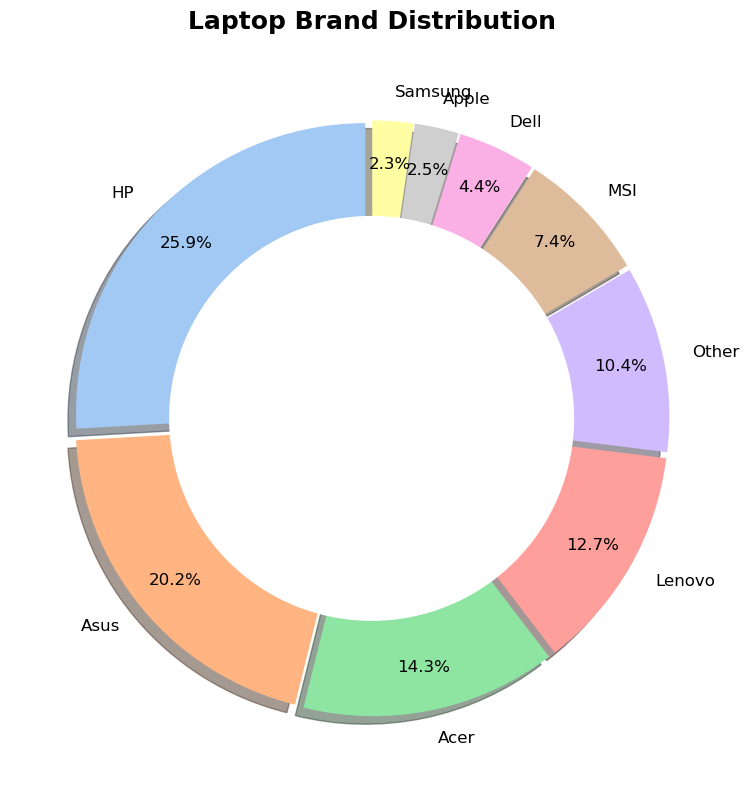

In [7]:
def plot_brand_distribution(df, title='Laptop Brand Distribution'):
    # Calculate brand frequencies
    brand_counts = df['name'].value_counts()
    
    # Style settings
    plt.style.use('seaborn-v0_8-pastel')
    colors = sns.color_palette('pastel')[:len(brand_counts)]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Create pie chart with enhanced styling
    wedges, texts, autotexts = ax.pie(
        brand_counts,
        labels=brand_counts.index,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85,
        explode=[0.03] * len(brand_counts),  # Separate slices
        shadow=True,
        textprops={'fontsize': 12}
    )
    
    # Adding a white circle in center for a donut effect
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig.gca().add_artist(centre_circle)
    
    # Adding the title
    ax.set_title(title, pad=20, fontdict={'fontsize': 18, 'fontweight': 'bold'})
    plt.tight_layout()
    
    return fig


fig = plot_brand_distribution(df)
plt.show()

Laptop Model Count

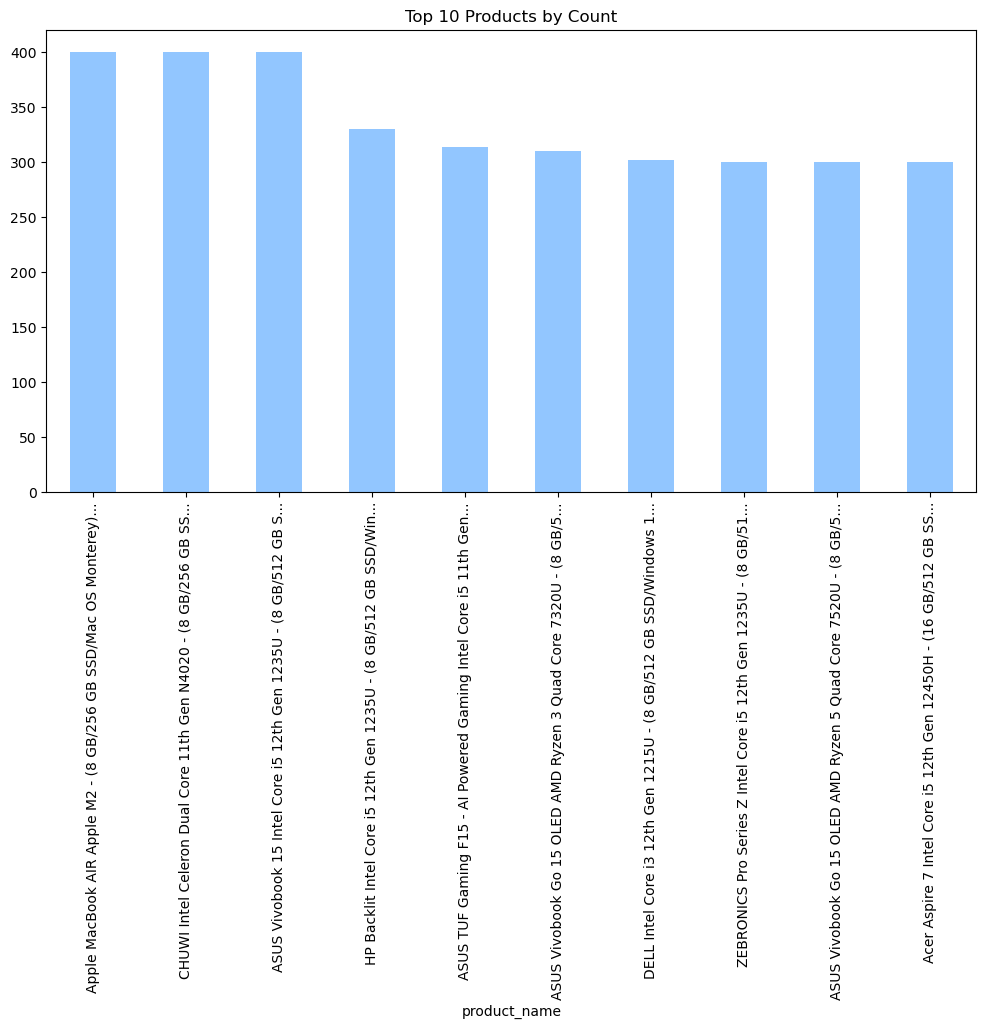

In [8]:
plt.figure(figsize = (12,6))
df['product_name'].value_counts().head(10).plot(kind = 'bar')
plt.title('Top 10 Products by Count')
plt.show()

Rating Distribution

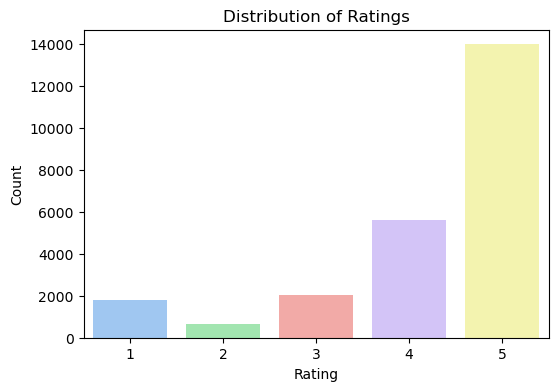

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='rating')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

Analysing the Reviews

In [10]:
def get_top_words(series, top_n=10):
    all_words = ' '.join(series.dropna().astype(str)).lower()
    tokens = re.findall(r'\b\w+\b', all_words)
    return Counter(tokens).most_common(top_n)

print("Top 10 words in 5-star review titles:")
print(get_top_words(df[df['rating'] == 5]['title']))

print("\nTop 10 words in 1-star review titles:")
print(get_top_words(df[df['rating'] == 1]['title']))

Top 10 words in 5-star review titles:
[('product', 2292), ('terrific', 1582), ('purchase', 1525), ('awesome', 1479), ('the', 853), ('best', 835), ('super', 825), ('in', 821), ('market', 813), ('fabulous', 810)]

Top 10 words in 1-star review titles:
[('product', 247), ('not', 243), ('waste', 228), ('money', 228), ('unsatisfactory', 153), ('worthless', 153), ('very', 148), ('poor', 148), ('absolute', 135), ('rubbish', 135)]


In [15]:
model_ratings = df.groupby('product_name')['rating'].mean().sort_values(ascending=False)

# Showing top 5 highest-rated models
print("Top 5 Highest Rated Laptop Models:")
print(model_ratings.head(5))

# Showing bottom 5 lowest-rated models
print("\nBottom 5 Lowest Rated Laptop Models:")
print(model_ratings.tail(5))

Top 5 Highest Rated Laptop Models:
product_name
ASUS AMD Ryzen 5 Quad Core - (16 GB/512 GB SSD/Windows 11 Home...    5.0
DELL Intel Core i5 13th Gen 1334U - (16 GB/512 GB SSD/Windows ...    5.0
ASUS Vivobook S 15 OLED Intel Core i9 13th Gen 13900H - (16 GB...    5.0
MSI Modern 14 H Intel Core i5 13th Gen 13420H - (16 GB/512 GB ...    5.0
MSI Cyborg 15 Intel Core i7 12th Gen 12650H - (16 GB/512 GB SS...    5.0
Name: rating, dtype: float64

Bottom 5 Lowest Rated Laptop Models:
product_name
Acer Aspire Lite Intel Core i5 12th Gen 1235U - (16 GB/1 TB SS...    2.333333
Acer Aspire Lite Intel Core i5 12th Gen 1235U - (16 GB/512 GB ...    2.333333
HP Laptop Intel Core i3 N305 - (8 GB/512 GB SSD/Windows 11 Hom...    2.333333
HP Victus Intel Core i7 12th Gen 12650H - (16 GB/1 TB SSD/Wind...    1.000000
Lenovo IdeaPad Slim 3 Intel Intel Core i7 13th Gen Core™ i7-13...    1.000000
Name: rating, dtype: float64


In [12]:
# Counting 5-star reviews by brand
top_5_star = df[df['rating'] == 5].groupby('name').size().sort_values(ascending=False)

# Counting 1-star reviews by brand
top_1_star = df[df['rating'] == 1].groupby('name').size().sort_values(ascending=False)

print("Top Brands by 5-Star Review Count:")
print(top_5_star.head(5))

print("\nTop Brands by 1-Star Review Count:")
print(top_1_star.head(5))

Top Brands by 5-Star Review Count:
name
HP        3640
Asus      2809
Acer      1833
Lenovo    1693
Other     1521
dtype: int64

Top Brands by 1-Star Review Count:
name
HP        429
Acer      406
Lenovo    289
Other     235
Asus      219
dtype: int64


Top 5 Laptops

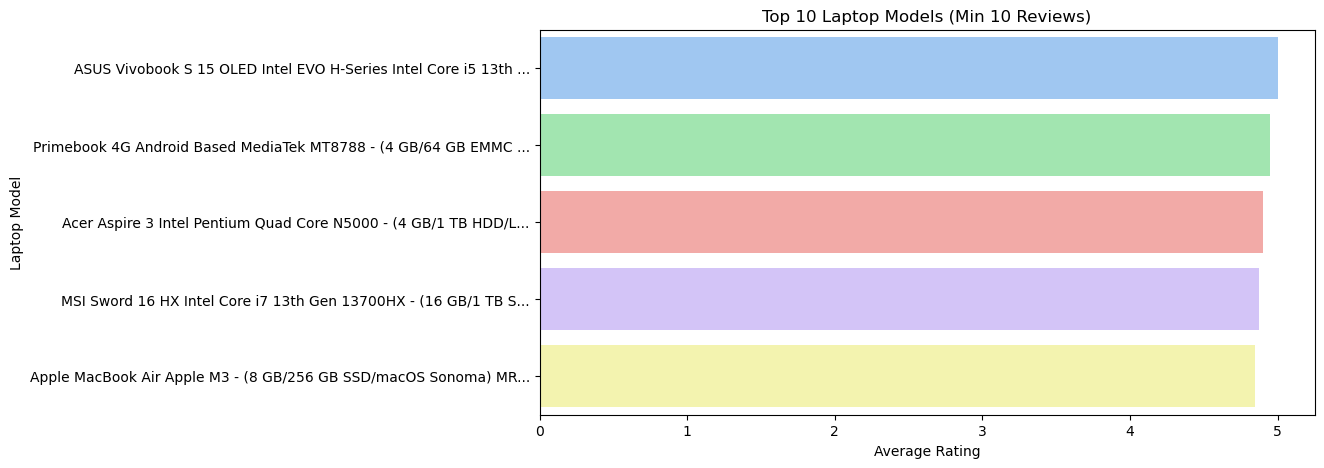

In [13]:
top_models = df.groupby('product_name').filter(lambda x: len(x) >= 10)
top_model_avg = top_models.groupby('product_name')['rating'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,5))
sns.barplot(x=top_model_avg.values, y=top_model_avg.index)
plt.title("Top 10 Laptop Models (Min 10 Reviews)")
plt.xlabel("Average Rating")
plt.ylabel("Laptop Model")
plt.show()